<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ IMPORTS ✨</span>
</div>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score
import pickle
from collections import defaultdict
from sklearn.utils import shuffle
import os
import cv2
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import pandas as pd

from torchinfo import summary
from sklearn.metrics import confusion_matrix
import seaborn as sns



<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ LOADING THE SPLIT DATA ARRAYS ✨</span>
</div>

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">📁 reminder to change the folder path to your numpy array folder 📁</span>
</div>

In [2]:
import numpy as np
import os
from sklearn.preprocessing import StandardScaler

# Define the folder path
folder_path = r"G:\CODING\py\data\numpy\melunfiltered\concatenatedspectrograms"

# Load the numpy files into the respective arrays with the correct capitalized naming
eeg_fold_1 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_1.npy'))
labels_fold_1 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_1.npy'))
patients_fold_1 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_1.npy'))

eeg_fold_2 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_2.npy'))
labels_fold_2 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_2.npy'))
patients_fold_2 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_2.npy'))

eeg_fold_3 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_3.npy'))
labels_fold_3 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_3.npy'))
patients_fold_3 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_3.npy'))

eeg_fold_4 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_4.npy'))
labels_fold_4 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_4.npy'))
patients_fold_4 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_4.npy'))

eeg_fold_5 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_5.npy'))
labels_fold_5 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_5.npy'))
patients_fold_5 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_5.npy'))

eeg_folds = [eeg_fold_1, eeg_fold_2, eeg_fold_3, eeg_fold_4, eeg_fold_5]
labels_folds = [labels_fold_1, labels_fold_2, labels_fold_3, labels_fold_4, labels_fold_5]
patients_folds = [patients_fold_1, patients_fold_2, patients_fold_3, patients_fold_4, patients_fold_5]

print(type(eeg_fold_4))
for i in range(len(eeg_folds)):
    eeg_folds[i] = eeg_folds[i].astype(np.float32)
    
    # Normalize data using StandardScaler
scaler = StandardScaler()
for i in range(len(eeg_folds)):
    original_shape = eeg_folds[i].shape
    eeg_folds[i] = scaler.fit_transform(eeg_folds[i].reshape(-1, eeg_folds[i].shape[-1])).reshape(original_shape)
    
    print(f"Data loaded and standardized. Shape of {i} fold:", eeg_folds[i].shape)
    print(f"Mean after standardization:", np.mean(eeg_folds[i]))
    print(f"Standard deviation after standardization:", np.std(eeg_folds[i]))

<class 'numpy.ndarray'>
Data loaded and standardized. Shape of 0 fold: (1297, 224, 224, 3)
Mean after standardization: -5.2833515e-10
Standard deviation after standardization: 1.0000012
Data loaded and standardized. Shape of 1 fold: (1237, 224, 224, 3)
Mean after standardization: 8.488398e-09
Standard deviation after standardization: 0.99999964
Data loaded and standardized. Shape of 2 fold: (1132, 224, 224, 3)
Mean after standardization: 1.0215647e-09
Standard deviation after standardization: 1.0
Data loaded and standardized. Shape of 3 fold: (1388, 224, 224, 3)
Mean after standardization: 9.72173e-09
Standard deviation after standardization: 1.000001
Data loaded and standardized. Shape of 4 fold: (1105, 224, 224, 3)
Mean after standardization: -4.0797268e-08
Standard deviation after standardization: 0.9999993


In [7]:
eeg_folds[1].shape, labels_folds[1].shape

((1237, 224, 224, 3), (1237,))

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">data balancer & early stopping</span>
</div>

In [7]:
def data_balancer(data, labels, factor):
    # Count the number of samples in each class
    num_class_0 = np.sum(labels == 0)
    num_class_1 = np.sum(labels == 1)
    num_class_2 = np.sum(labels == 2)

    # Find the minimum number of samples across all classes
    min_samples = min(num_class_0, num_class_1, num_class_2)

    # Calculate the number of samples to take from each class
    samples_per_class = min_samples // factor

    # Randomly sample 'samples_per_class' from each class
    class_0_indices = np.random.choice(np.where(labels == 0)[0], samples_per_class, replace=False)
    class_1_indices = np.random.choice(np.where(labels == 1)[0], samples_per_class, replace=False)
    class_2_indices = np.random.choice(np.where(labels == 2)[0], samples_per_class, replace=False)

    # Combine balanced indices
    balanced_indices = np.concatenate((class_0_indices, class_1_indices, class_2_indices))

    # Shuffle the balanced indices
    np.random.shuffle(balanced_indices)

    # Create balanced training data and labels
    balanced_data = data[balanced_indices]
    balanced_labels = labels[balanced_indices]

    return balanced_data, balanced_labels

In [8]:
class EarlyStopping:
    def __init__(self, patience=5):
        """
        Initializes the early stopping mechanism based on divergence detection.

        Args:
            patience (int): Number of consecutive epochs with increasing validation loss
                            before stopping.
        """
        self.patience = patience
        self.best_loss = None
        self.counter = 0
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, model):
        """
        Checks if the validation loss is diverging and updates the state accordingly.

        Args:
            val_loss (float): Current epoch's validation loss.
            model (torch.nn.Module): The model being trained.
        """
        if self.best_loss is None or val_loss < self.best_loss:
            # Improvement detected
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
            self.counter = 0
        else:
            # Validation loss increased
            self.counter += 1
            if self.counter >= self.patience:
                print(f"Divergence detected. Stopping training after {self.counter} epochs.")
                self.early_stop = True

    def load_best_model(self, model):
        """
        Restores the model to the state with the lowest validation loss.

        Args:
            model (torch.nn.Module): The model to restore.
        """
        model.load_state_dict(self.best_model_state)




<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Result plotting</span>
</div>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    auc,
    f1_score,
    balanced_accuracy_score,
    classification_report,
)
from sklearn.preprocessing import label_binarize

def plot_metrics(labels, predictions, n_classes=3):
    """
    Plots and computes metrics for classification tasks.

    Args:
        labels (array-like): True labels.
        predictions (array-like): Predicted probabilities or class predictions.
        n_classes (int): Number of classes (default is 3 for multi-class classification).
    """
    # If predictions are probabilities, convert to class predictions
    if predictions.ndim > 1:
        predicted_classes = np.argmax(predictions, axis=1)
    else:
        predicted_classes = predictions

    # Confusion Matrix
    cm = confusion_matrix(labels, predicted_classes)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Class-wise Accuracy
    print("\nClass-wise Accuracy:")
    for d in range(n_classes):
        correct_preds = cm[d][d]
        total_true_samples = sum(cm[d])
        ratio_correct = correct_preds / total_true_samples if total_true_samples != 0 else 0
        print(f'Class {d}: Correct Predictions / Total True Samples = {correct_preds}/{total_true_samples} ({ratio_correct:.2%})')

    # Precision-Recall Curves and AUPRC
    print("\nPrecision-Recall Curves:")
    labels_binarized = label_binarize(labels, classes=np.arange(n_classes))
    auprcs = []
    for class_idx in range(n_classes):
        precision, recall, _ = precision_recall_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
        auprc = auc(recall, precision)
        auprcs.append(auprc)
        plt.plot(recall, precision, label=f'Class {class_idx + 1} (AUPRC = {auprc:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves for each class')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # ROC Curves and AUC
    print("\nROC Curves:")
    for class_idx in range(n_classes):
        fpr, tpr, _ = roc_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {class_idx + 1} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for each class')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Mean F1 Score
    f1 = f1_score(labels, predicted_classes, average='macro')
    print(f"\nMean F1 Score: {f1:.4f}")

    # Balanced Accuracy
    balanced_acc = balanced_accuracy_score(labels, predicted_classes)
    print(f"Balanced Accuracy: {balanced_acc:.4f}")

    # Average AUPRC
    mean_auprc = np.mean(auprcs)
    print(f"Average AUPRC: {mean_auprc:.4f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(labels, predicted_classes))

    return {
        "confusion_matrix": cm,
        "class_wise_accuracy": [cm[d][d] / sum(cm[d]) if sum(cm[d]) != 0 else 0 for d in range(n_classes)],
        "mean_f1_score": f1,
        "balanced_accuracy": balanced_acc,
        "average_auprc": mean_auprc,
        "auprc_per_class": auprcs,
    }

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">MODEL GOES HERE</span>
</div>

In [10]:
debug_mode_flag = False
import torch
import torch.nn as nn

class CustomCnn(nn.Module):
    def __init__(self, debug_mode_flag=False):
        super().__init__()
        self.debug_mode_flag = debug_mode_flag
        
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)  # Reduces spatial size
        )
        
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)  # Further reduces spatial size
        )

        # Global Average Pooling to reduce spatial dimensions 
        self.global_avg_pool = nn.AdaptiveAvgPool2d((8, 8))  # Keeps a manageable seq_len
        self.flatten = nn.Flatten(start_dim=2)  # Keeps batch & channel dims

    def forward(self, x):
        if self.debug_mode_flag: print(f"Input shape: {x.shape}")
        
        x = self.block_1(x)
        if self.debug_mode_flag: print(f"Block 1 shape: {x.shape}")
        
        x = self.block_2(x)
        if self.debug_mode_flag: print(f"Block 2 shape: {x.shape}")
        
        x = self.global_avg_pool(x)  # (batch, 128, 8, 8)
        if self.debug_mode_flag: print(f"Global Avg Pool shape: {x.shape}")

        # x = self.flatten(x)  # (batch, 128, 64)
        # if self.debug_mode_flag: print(f"Flattened shape (Transformer Input): {x.shape}")
        
        return x

    
class TransformerEncoder(nn.Module):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout_rate=0.1):
        super(TransformerEncoder, self).__init__()
        self.att = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads)
        self.ffn = nn.Sequential(
            nn.Linear(embed_dim, ff_dim),
            nn.ReLU(),
            nn.Linear(ff_dim, embed_dim)
        )
        self.layernorm1 = nn.LayerNorm(embed_dim)
        self.layernorm2 = nn.LayerNorm(embed_dim)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.dropout2 = nn.Dropout(dropout_rate)

    def forward(self, x):
        attn_output, _ = self.att(x, x, x)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(x + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)
    
class TRANS_CNN(nn.Module):
    def __init__(self, input_shape, num_classes, embed_dim=512, num_heads=2, ff_dim=64, num_transformer_blocks=4):
        
        super(TRANS_CNN,self).__init__()
        
        self.num_transformer_blocks = num_transformer_blocks
        self.cnn_extractor = CustomCnn()
        
        self.projection = nn.Linear(512, embed_dim)
        
        self.encoder = nn.ModuleList([
            TransformerEncoder(embed_dim,num_heads,ff_dim) for _ in range(num_transformer_blocks)
        ])
        
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.dropout = nn.Dropout(0.1)
        
        self.precls = nn.Linear(embed_dim,embed_dim)
        self.precls2 = nn.Linear(embed_dim,embed_dim)
        self.precls3 = nn.Linear(embed_dim,embed_dim//4)
        
        self.clf = nn.Linear(embed_dim//4,num_classes)
        
        
    def forward(self,x):
        
        x = self.cnn_extractor(x)
        if debug_mode_flag: print(f"x shape after cnn extraction = {x.shape}")
        
        B,C,H,W = x.shape
        
        x = x.view(B,H*W,C)
        if debug_mode_flag: print(f"x shape after changing view= {x.shape}")
        
        # x = self.projection(x)
        # if debug_mode_flag: print(f"x shape after projection= {x.shape}")
        
        for encoderblock in self.encoder:
            x = encoderblock(x)
            
        if debug_mode_flag: print(f"x shape after passing thru encoder= {x.shape}")
        
        x = x.permute(1,0,2)
        if debug_mode_flag: print(f"x shape after permuting{x.shape}")
        
        x = self.precls3(x)
        if debug_mode_flag: print(f"precls3 {x.shape}")
        
        x = self.dropout(x)
        
        x = x.mean(dim=0)  # Global average pooling over sequence (9 tokens → 1 token)
        if debug_mode_flag: print(f"x shape after average pooling {x.shape}")

        x = self.clf(x)  #they see me rolling
        if debug_mode_flag: print(f"cls {x.shape}")
        
        
        return x

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Test with demo data & model Summary</span>
</div>

In [11]:
model  = TRANS_CNN(input_shape=(224,224,3),num_classes=3,num_heads=4,num_transformer_blocks=128,embed_dim=128) # declare model here
randomdata = torch.randn((1,3,224,224))
output = model(randomdata)
output.shape

torch.Size([1, 3])

In [12]:
from torchinfo import summary

summary(model)

Layer (type:depth-idx)                                       Param #
TRANS_CNN                                                    --
├─CustomCnn: 1-1                                             --
│    └─Sequential: 2-1                                       --
│    │    └─Conv2d: 3-1                                      448
│    │    └─BatchNorm2d: 3-2                                 32
│    │    └─ReLU: 3-3                                        --
│    │    └─Conv2d: 3-4                                      4,640
│    │    └─BatchNorm2d: 3-5                                 64
│    │    └─ReLU: 3-6                                        --
│    │    └─MaxPool2d: 3-7                                   --
│    └─Sequential: 2-2                                       --
│    │    └─Conv2d: 3-8                                      18,496
│    │    └─BatchNorm2d: 3-9                                 128
│    │    └─ReLU: 3-10                                       --
│    │    └─Conv2d: 3-11  

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Training Code</span>
</div>

In [13]:

import pandas as pd
import os
import datetime


torch.random.manual_seed(42)  # For reproducibility
np.random.seed(42)  # For reproducibility

params = {'num_heads': 8, 'num_transformer_blocks': 8, 'learning_rate': 0.000015, 'optimizer': 'Adam', 'weight_decay': 5.8e-06, 'batch_size': 16}


# Fold indices and other configurations
num_folds = 5
fold_indices = np.random.permutation(np.arange(num_folds))
val_fold_indices = np.roll(fold_indices, 1)

test_folds_chosen = []
val_folds_chosen = []
fold_confusion_matrices = []  # To store confusion matrices for each fold
fold_accuracies = []  # To store balanced accuracy for each fold
fold_auprcs = []  # To store AUPRC for each fold

# Model and training configurations
num_classes = 3
epochs = 100
input_shape = (3,224,224)
embed_dim = 128
num_heads = params['num_heads']
num_transformer_blocks = params['num_transformer_blocks']
learning_rate = params['learning_rate']
optimizer = params['optimizer']
weight_decay = params['weight_decay']
batch_size = params['batch_size']

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



In [14]:
def save_results_to_csv(fold_accuracies, fold_auprcs, fold_confusion_matrices, model_info, csv_path=r"G:\CODING\py\newnotebooks\results.csv"):
    """
    Save all results from the current experiment to a CSV file
    
    Parameters:
    - fold_accuracies: list of balanced accuracy scores for each fold
    - fold_auprcs: list of AUPRC scores for each fold
    - fold_confusion_matrices: list of confusion matrices for each fold
    - model_info: string with model architecture description
    - csv_path: path to the CSV file to save results
    """
    # Current time for experiment identification
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    
    # Prepare data for the DataFrame
    data = {
        "timestamp": timestamp,
        "model_info": model_info,
        "num_classes": num_classes,
        "learning_rate": learning_rate,
        "epochs": epochs,
        "mean_balanced_accuracy": np.mean(fold_accuracies),
        "std_balanced_accuracy": np.std(fold_accuracies),
        "mean_auprc": np.mean(fold_auprcs),
        "std_auprc": np.std(fold_auprcs),
    }
    
    # Add individual fold results
    for i, (acc, auprc) in enumerate(zip(fold_accuracies, fold_auprcs)):
        data[f"fold_{i+1}_accuracy"] = acc
        data[f"fold_{i+1}_auprc"] = auprc
    
    # Add confusion matrix info
    for i, cm in enumerate(fold_confusion_matrices):
        data[f"fold_{i+1}_confusion_matrix"] = str(cm)
    
    # Create DataFrame and append to CSV
    df = pd.DataFrame([data])
    
    # Check if file exists
    file_exists = os.path.isfile(csv_path)
    
    # Save to CSV
    if file_exists:
        df.to_csv(csv_path, mode='a', header=False, index=False)
    else:
        df.to_csv(csv_path, mode='w', header=True, index=False)
    
    print(f"Results saved to {csv_path}")

Fold No: 1
training on folds: [[np.int64(4), np.int64(2), np.int64(0)]]
validation on folds: 3
test on folds: 1
Epoch [1/100], Loss: 1.1000, Accuracy: 0.3567
Validation Loss: 1.0855, Validation Accuracy: 0.3748
Epoch [2/100], Loss: 1.0908, Accuracy: 0.4150
Validation Loss: 1.0738, Validation Accuracy: 0.3529
Epoch [3/100], Loss: 1.0909, Accuracy: 0.3933
Validation Loss: 1.0723, Validation Accuracy: 0.3946
Epoch [4/100], Loss: 1.0889, Accuracy: 0.4300
Validation Loss: 1.0497, Validation Accuracy: 0.3803
Epoch [5/100], Loss: 1.0837, Accuracy: 0.4400
Validation Loss: 1.0747, Validation Accuracy: 0.3875
Epoch [6/100], Loss: 1.0775, Accuracy: 0.4567
Validation Loss: 1.0966, Validation Accuracy: 0.3878
Epoch [7/100], Loss: 1.0652, Accuracy: 0.4750
Validation Loss: 1.0962, Validation Accuracy: 0.3851
Epoch [8/100], Loss: 1.0610, Accuracy: 0.4983
Validation Loss: 1.0853, Validation Accuracy: 0.3795
Epoch [9/100], Loss: 1.0492, Accuracy: 0.5183
Validation Loss: 1.0368, Validation Accuracy: 0.40

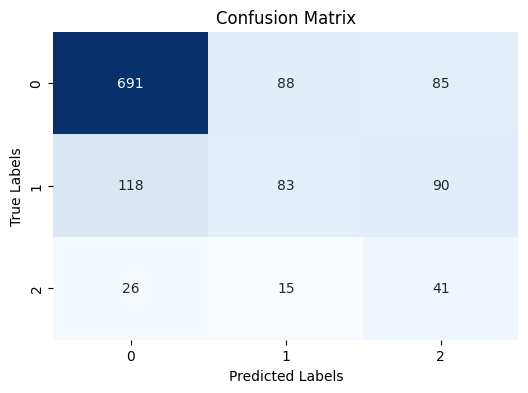


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 691/864 (79.98%)
Class 1: Correct Predictions / Total True Samples = 83/291 (28.52%)
Class 2: Correct Predictions / Total True Samples = 41/82 (50.00%)

Precision-Recall Curves:


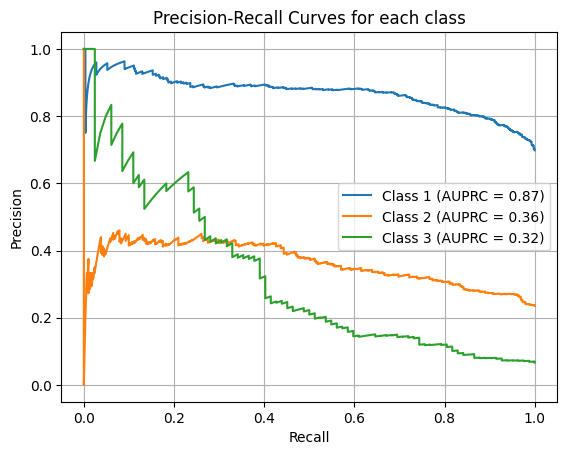


ROC Curves:


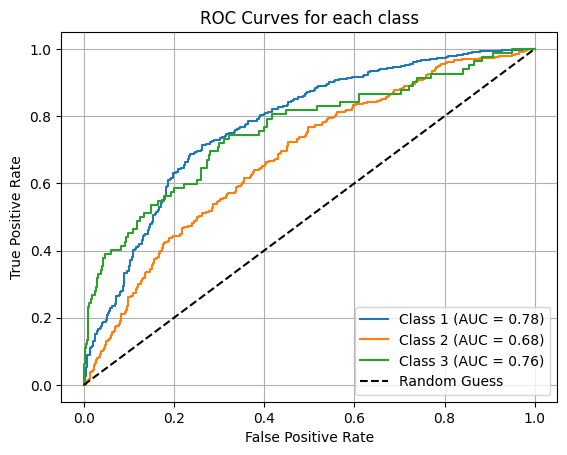


Mean F1 Score: 0.4789
Balanced Accuracy: 0.5283
Average AUPRC: 0.5163

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       864
           1       0.45      0.29      0.35       291
           2       0.19      0.50      0.28        82

    accuracy                           0.66      1237
   macro avg       0.49      0.53      0.48      1237
weighted avg       0.70      0.66      0.67      1237

Fold No: 2
training on folds: [[np.int64(2), np.int64(0), np.int64(3)]]
validation on folds: 1
test on folds: 4
Epoch [1/100], Loss: 1.1033, Accuracy: 0.3350
Validation Loss: 1.0578, Validation Accuracy: 0.3275
Epoch [2/100], Loss: 1.0998, Accuracy: 0.3350
Validation Loss: 1.0969, Validation Accuracy: 0.3760
Epoch [3/100], Loss: 1.0981, Accuracy: 0.3503
Validation Loss: 1.1277, Validation Accuracy: 0.3406
Epoch [4/100], Loss: 1.0982, Accuracy: 0.3333
Validation Loss: 1.0750, Validation Accuracy: 0.3924
Epoch [5/100], L

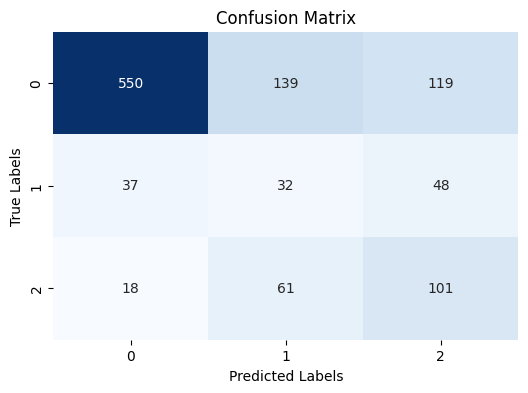


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 550/808 (68.07%)
Class 1: Correct Predictions / Total True Samples = 32/117 (27.35%)
Class 2: Correct Predictions / Total True Samples = 101/180 (56.11%)

Precision-Recall Curves:


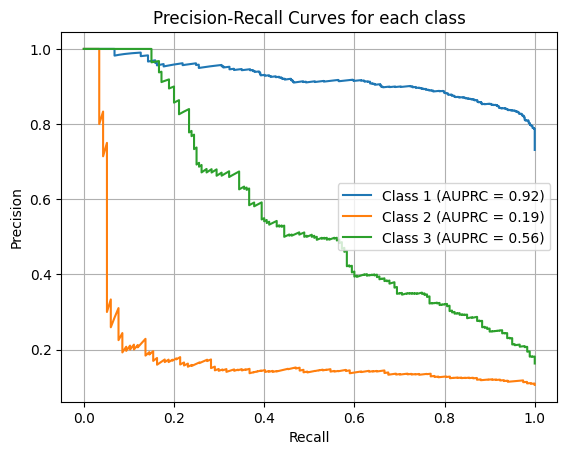


ROC Curves:


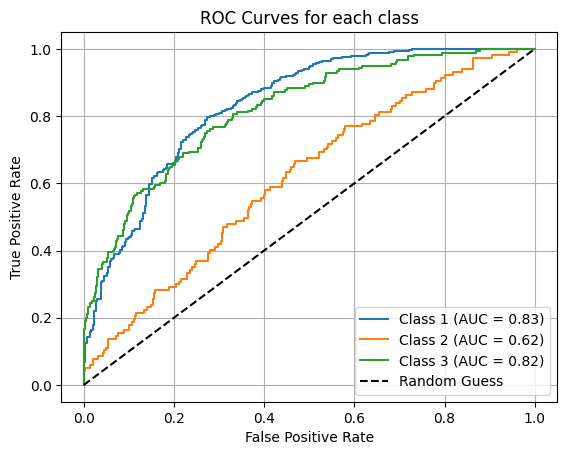


Mean F1 Score: 0.4709
Balanced Accuracy: 0.5051
Average AUPRC: 0.5558

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.68      0.78       808
           1       0.14      0.27      0.18       117
           2       0.38      0.56      0.45       180

    accuracy                           0.62      1105
   macro avg       0.47      0.51      0.47      1105
weighted avg       0.74      0.62      0.66      1105

Fold No: 3
training on folds: [[np.int64(1), np.int64(0), np.int64(3)]]
validation on folds: 4
test on folds: 2
Epoch [1/100], Loss: 1.1014, Accuracy: 0.3492
Validation Loss: 1.1584, Validation Accuracy: 0.3432
Epoch [2/100], Loss: 1.1012, Accuracy: 0.3474
Validation Loss: 1.0861, Validation Accuracy: 0.3662
Epoch [3/100], Loss: 1.0961, Accuracy: 0.3651
Validation Loss: 1.0905, Validation Accuracy: 0.3833
Epoch [4/100], Loss: 1.0909, Accuracy: 0.3845
Validation Loss: 1.0954, Validation Accuracy: 0.3650
Epoch [5/100], L

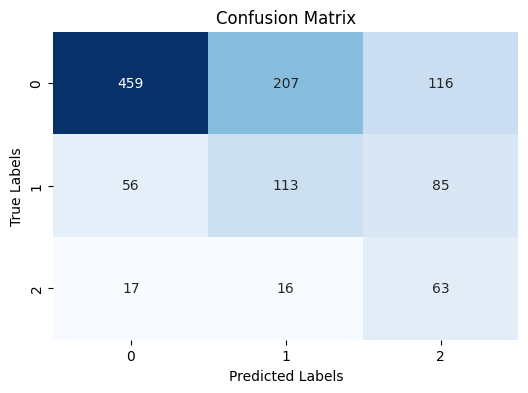


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 459/782 (58.70%)
Class 1: Correct Predictions / Total True Samples = 113/254 (44.49%)
Class 2: Correct Predictions / Total True Samples = 63/96 (65.62%)

Precision-Recall Curves:


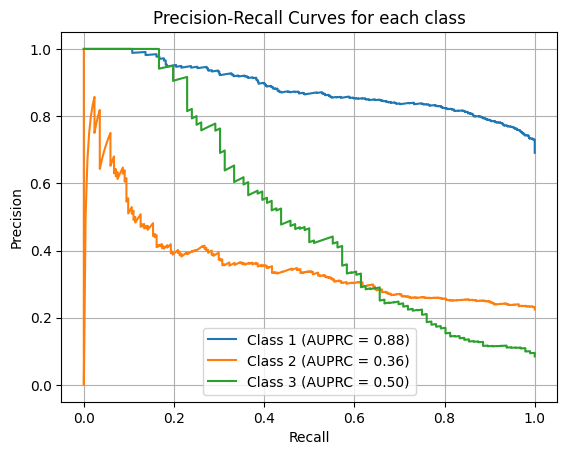


ROC Curves:


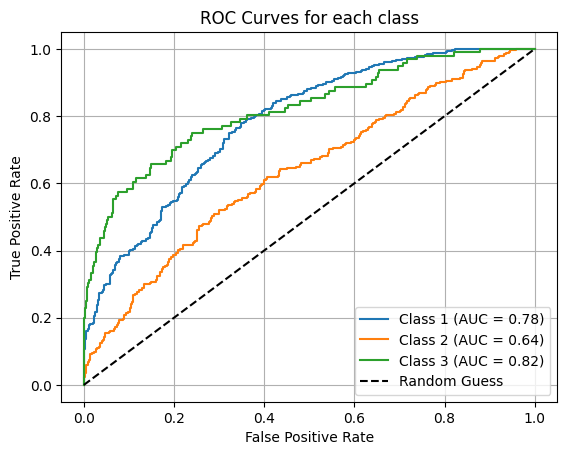


Mean F1 Score: 0.4772
Balanced Accuracy: 0.5627
Average AUPRC: 0.5815

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.59      0.70       782
           1       0.34      0.44      0.38       254
           2       0.24      0.66      0.35        96

    accuracy                           0.56      1132
   macro avg       0.48      0.56      0.48      1132
weighted avg       0.69      0.56      0.60      1132

Fold No: 4
training on folds: [[np.int64(1), np.int64(4), np.int64(3)]]
validation on folds: 2
test on folds: 0
Epoch [1/100], Loss: 1.1029, Accuracy: 0.3364
Validation Loss: 1.1349, Validation Accuracy: 0.3351
Epoch [2/100], Loss: 1.0983, Accuracy: 0.3565
Validation Loss: 1.0906, Validation Accuracy: 0.3499
Epoch [3/100], Loss: 1.0966, Accuracy: 0.3781
Validation Loss: 1.0743, Validation Accuracy: 0.3245
Epoch [4/100], Loss: 1.0936, Accuracy: 0.3966
Validation Loss: 1.0729, Validation Accuracy: 0.3378
Epoch [5/100], L

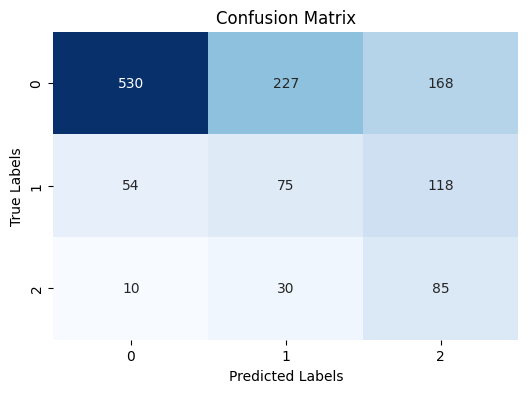


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 530/925 (57.30%)
Class 1: Correct Predictions / Total True Samples = 75/247 (30.36%)
Class 2: Correct Predictions / Total True Samples = 85/125 (68.00%)

Precision-Recall Curves:


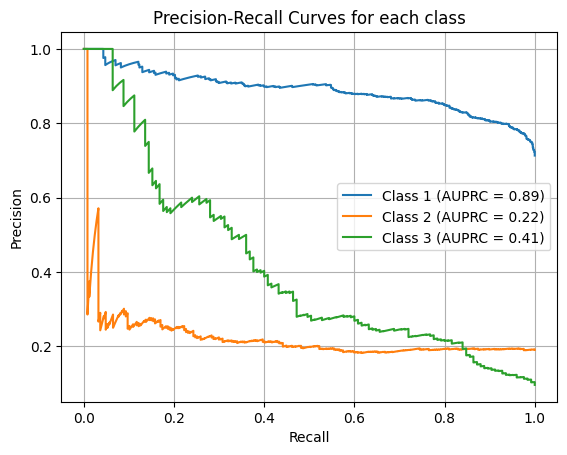


ROC Curves:


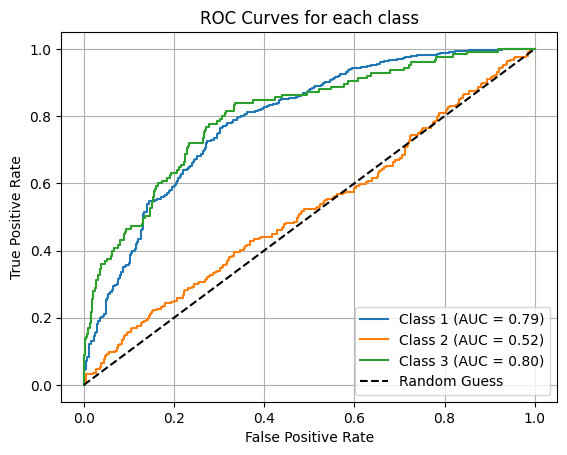


Mean F1 Score: 0.4332
Balanced Accuracy: 0.5189
Average AUPRC: 0.5075

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.57      0.70       925
           1       0.23      0.30      0.26       247
           2       0.23      0.68      0.34       125

    accuracy                           0.53      1297
   macro avg       0.45      0.52      0.43      1297
weighted avg       0.70      0.53      0.58      1297

Fold No: 5
training on folds: [[np.int64(1), np.int64(4), np.int64(2)]]
validation on folds: 0
test on folds: 3
Epoch [1/100], Loss: 1.1014, Accuracy: 0.3445
Validation Loss: 1.0618, Validation Accuracy: 0.3358
Epoch [2/100], Loss: 1.1003, Accuracy: 0.3017
Validation Loss: 1.0778, Validation Accuracy: 0.3556
Epoch [3/100], Loss: 1.0950, Accuracy: 0.3743
Validation Loss: 1.1151, Validation Accuracy: 0.3937
Epoch [4/100], Loss: 1.0941, Accuracy: 0.4004
Validation Loss: 1.0770, Validation Accuracy: 0.3815
Epoch [5/100], L

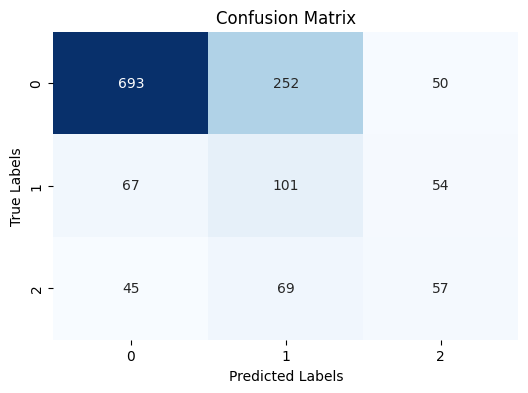


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 693/995 (69.65%)
Class 1: Correct Predictions / Total True Samples = 101/222 (45.50%)
Class 2: Correct Predictions / Total True Samples = 57/171 (33.33%)

Precision-Recall Curves:


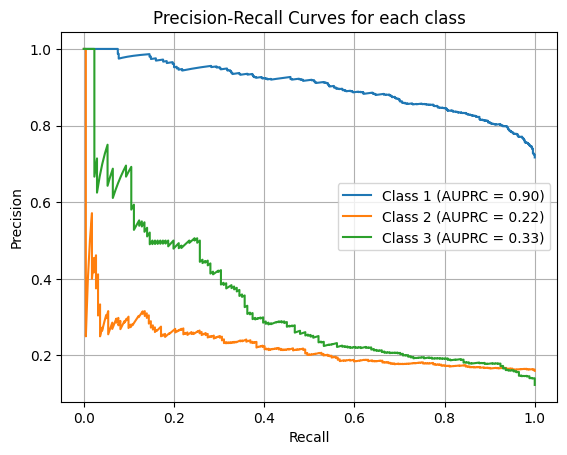


ROC Curves:


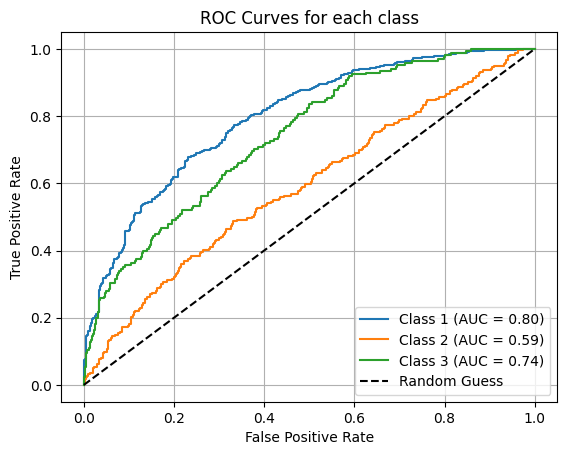


Mean F1 Score: 0.4757
Balanced Accuracy: 0.4949
Average AUPRC: 0.4870

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       995
           1       0.24      0.45      0.31       222
           2       0.35      0.33      0.34       171

    accuracy                           0.61      1388
   macro avg       0.48      0.49      0.48      1388
weighted avg       0.70      0.61      0.64      1388

Accuracy for each fold: [np.float64(0.5283306287387043), np.float64(0.5051028179741052), np.float64(0.5626961371676367), np.float64(0.5188722325564431), np.float64(0.49492356678286326)]
AUPRC for each fold: [np.float64(0.5163161120797214), np.float64(0.5557692706573363), np.float64(0.581538729501061), np.float64(0.5075216691501625), np.float64(0.4870064244027297)]
Average AUPRC across all folds: 0.5296304411582021
Average Balanced Accuracy across all folds: 0.5219850766439504


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc

from torch.optim.lr_scheduler import CosineAnnealingLR, LinearLR
from torch.optim.lr_scheduler import SequentialLR



# Training loop for cross-validation
for fold_idx in range(num_folds):
    print(f'Fold No: {fold_idx + 1}')
    
    # Initialize model, loss, and optimizer
    fold_model = TRANS_CNN(input_shape=input_shape,num_classes=num_classes,embed_dim=128,num_heads=num_heads,num_transformer_blocks=num_transformer_blocks) # Initialize your model here
    fold_model.to(device)
    
    criterion = nn.CrossEntropyLoss(label_smoothing=0.3)
    optimizer = optim.AdamW(fold_model.parameters(), lr=learning_rate,weight_decay=weight_decay)
    
    
    # Split data into train, validation, and test sets
    test_fold = fold_indices[fold_idx]
    val_fold = val_fold_indices[fold_idx]
    train_folds = [fold for fold in fold_indices if fold != test_fold and fold != val_fold]
    
    print(f"training on folds: {[train_folds]}")
    print(f"validation on folds: {val_fold}")
    print(f"test on folds: {test_fold}")
    

    train_data = np.concatenate([eeg_folds[j] for j in train_folds])
    train_labels = np.concatenate([labels_folds[j] for j in train_folds])
    train_data = train_data.transpose(0, 3, 1, 2)  # Transpose to match PyTorch input format

    test_folds_chosen.append(test_fold)
    val_folds_chosen.append(val_fold)
    
    early_stopping = EarlyStopping(patience=10)
    
    # Training loop
    for epoch in range(epochs):
        balanced_train_data, balanced_train_labels = data_balancer(train_data, train_labels, factor=2)

        train_dataset = TensorDataset(
            torch.tensor(balanced_train_data, dtype=torch.float32).to(device),
            torch.tensor(balanced_train_labels, dtype=torch.long).to(device)
        )
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        
        fold_model.train()
        running_loss = 0.0
        all_preds = []
        all_labels = []
        
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = fold_model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            
            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = balanced_accuracy_score(all_labels, all_preds)
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

        # Validation loop
        val_data = eeg_folds[val_fold].transpose(0, 3, 1, 2)
        val_labels = labels_folds[val_fold]
        val_dataset = TensorDataset(
            torch.tensor(val_data, dtype=torch.float32).to(device),
            torch.tensor(val_labels, dtype=torch.long).to(device)
        )
        val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)

        fold_model.eval()
        val_loss = 0.0
        val_preds = []
        val_labels_list = []

        with torch.no_grad():
            for val_inputs, val_labels in val_loader:
                val_outputs = fold_model(val_inputs)
                loss = criterion(val_outputs, val_labels)
                val_loss += loss.item()

                _, val_batch_preds = torch.max(val_outputs, 1)
                val_preds.extend(val_batch_preds.cpu().numpy())
                val_labels_list.extend(val_labels.cpu().numpy())

        val_loss /= len(val_loader)
        val_acc = balanced_accuracy_score(val_labels_list, val_preds)
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

        early_stopping(val_loss, fold_model)
        if early_stopping.early_stop:
            print("Early stopping")
            break

    # Load the best model
    early_stopping.load_best_model(fold_model)

    # Test loop
    test_data = eeg_folds[test_fold].transpose(0, 3, 1, 2)
    test_labels = labels_folds[test_fold]
    test_dataset = TensorDataset(
        torch.tensor(test_data, dtype=torch.float32).to(device),
        torch.tensor(test_labels, dtype=torch.long).to(device)
    )
    test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

    fold_model.eval()
    test_probs = []
    test_preds = []
    test_labels_list = []

    with torch.no_grad():
        for test_inputs, test_labels in test_loader:
            test_outputs = fold_model(test_inputs)
            probabilities = torch.softmax(test_outputs, dim=1)
            test_probs.extend(probabilities.cpu().numpy())
            _, preds = torch.max(probabilities, 1)
            test_preds.extend(preds.cpu().numpy())
            test_labels_list.extend(test_labels.cpu().numpy())

    # Compute metrics
    test_acc = balanced_accuracy_score(test_labels_list, test_preds)
    fold_accuracies.append(test_acc)

    cm = confusion_matrix(test_labels_list, test_preds)
    fold_confusion_matrices.append(cm)

    test_labels_binarized = label_binarize(test_labels_list, classes=np.arange(num_classes))
    test_auprcs = []
    for class_idx in range(num_classes):
        precision, recall, _ = precision_recall_curve(test_labels_binarized[:, class_idx], np.array(test_probs)[:, class_idx])
        auprc = auc(recall, precision)
        test_auprcs.append(auprc)

    mean_test_auprc = np.mean(test_auprcs)
    fold_auprcs.append(mean_test_auprc)

    print(f'Test Fold {fold_idx + 1}, Mean AUPRC: {mean_test_auprc:.4f}, Balanced Accuracy: {test_acc:.4f}')

    # Use the plot_metrics function to visualize metrics
    plot_metrics(np.array(test_labels_list), np.array(test_probs), n_classes=num_classes)

# Final metrics across all folds
average_auprc = np.mean(fold_auprcs)
mean_accuracy = np.mean(fold_accuracies)
print(f'Accuracy for each fold: {fold_accuracies}')
print(f'AUPRC for each fold: {fold_auprcs}')
print(f'Average AUPRC across all folds: {average_auprc}')
print(f'Average Balanced Accuracy across all folds: {mean_accuracy}')
    


In [16]:
# Save all results to CSV
model_description = f"TRANS_CNN CONCAT std scaler NORMALIZED MANUAL 3 classes"
save_results_to_csv(fold_accuracies, fold_auprcs, fold_confusion_matrices, model_description)

Results saved to G:\CODING\py\newnotebooks\results.csv
